In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv("data_banknote_authentication.txt") # https://archive.ics.uci.edu/ml/datasets/banknote+authentication
df.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]

In [37]:
df

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


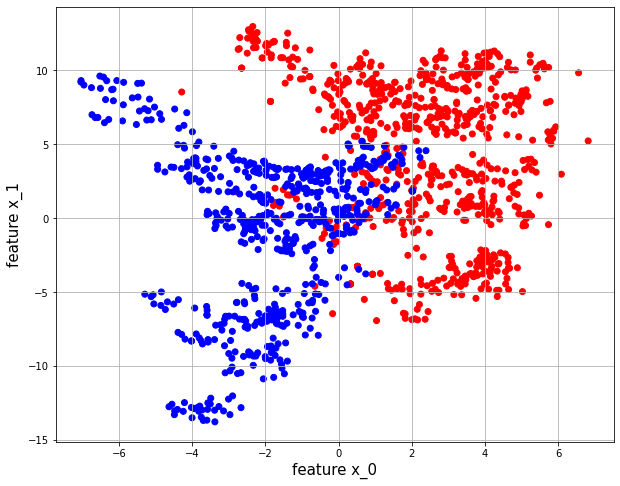

In [77]:
X = df[["Variance", "Skewness"]].values
y = df["Class"].values
colors = ["red" if label == 0 else "blue" for label in df["Class"].values]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

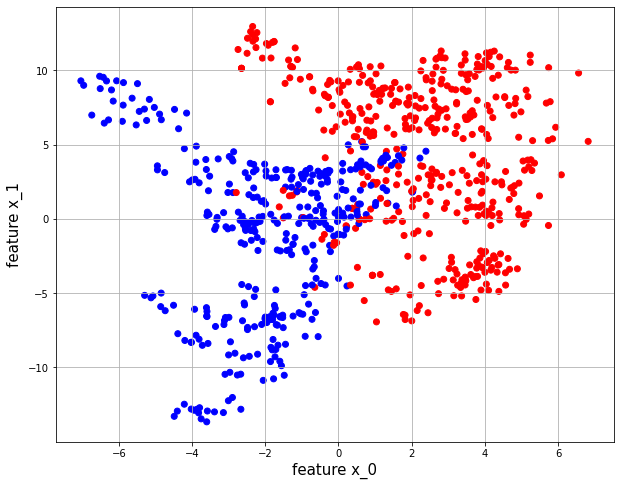

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [80]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_0 <= 0.27
|   |--- x_1 <= 7.57
|   |   |--- x_0 <= -1.63
|   |   |   |--- x_1 <= 1.77
|   |   |   |   |--- class: 1
|   |   |   |--- x_1 >  1.77
|   |   |   |   |--- x_1 <= 1.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_1 >  1.78
|   |   |   |   |   |--- class: 1
|   |   |--- x_0 >  -1.63
|   |   |   |--- x_1 <= 5.44
|   |   |   |   |--- x_0 <= -1.61
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  -1.61
|   |   |   |   |   |--- x_1 <= -1.78
|   |   |   |   |   |   |--- x_0 <= -0.65
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_0 >  -0.65
|   |   |   |   |   |   |   |--- x_0 <= -0.64
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x_0 >  -0.64
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_1 >  -1.78
|   |   |   |   |   |   |--- x_0 <= -1.49
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_0 >  -1.49
|   |   |   |   |   |   |   |--- x_1 <= -1.31

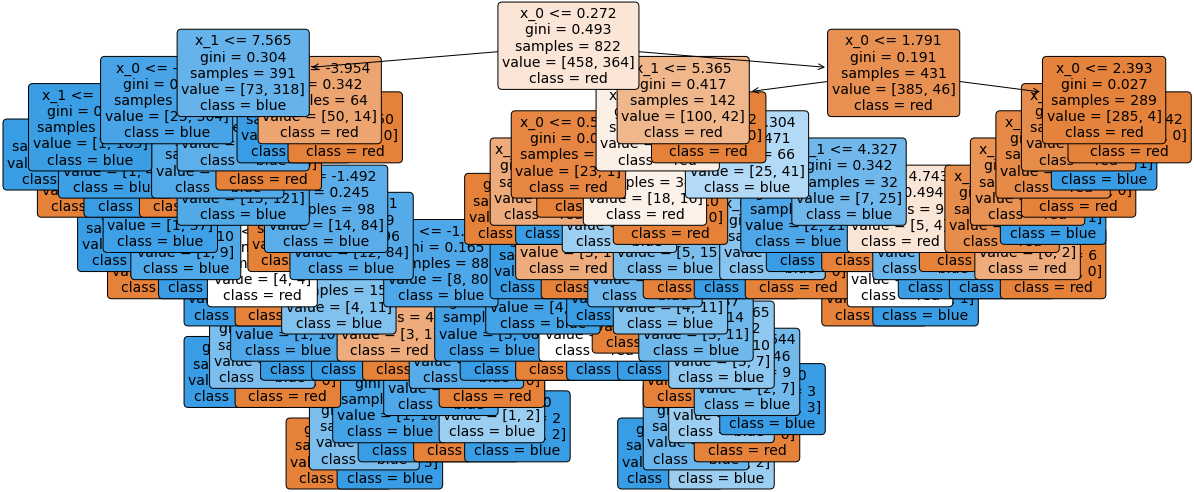

In [81]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

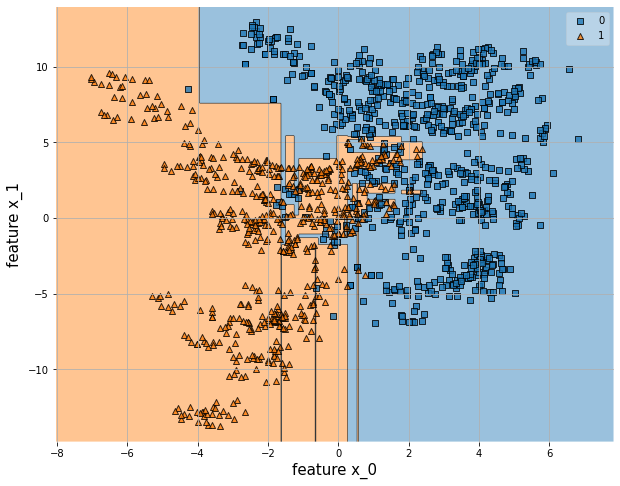

In [82]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

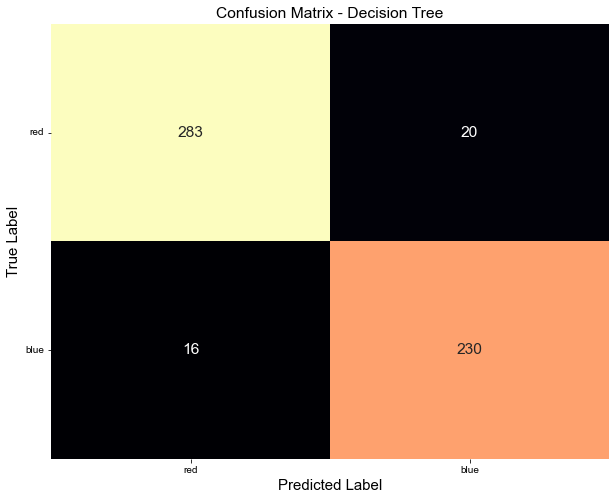

In [83]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [84]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       303
           1       0.92      0.93      0.93       246

    accuracy                           0.93       549
   macro avg       0.93      0.93      0.93       549
weighted avg       0.93      0.93      0.93       549

